In [1]:
import pandas as pd
from tqdm import tqdm
from convokit import Corpus, Speaker, Utterance, download
from collections import defaultdict
import numpy as np

In [2]:
df = pd.read_csv('LIWC2015 Results_affcon_4_categories.csv')
df.head(5)

,affcon_gamemove,affcon_reasoning,affcon_rapport,affcon_shareinformation,Input.deception_quadrant,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1,1,1,1,Straightforward,12,62.04,1.00,99.00,25.77,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,Straightforward,28,83.81,92.33,52.86,1.00,...,7.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,Straightforward,8,93.26,89.42,7.84,25.77,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,0,Straightforward,31,2.54,37.35,39.18,83.22,...,3.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,1,Cassandra,27,66.94,3.22,33.94,1.00,...,7.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
speakers_list = df['Input.speaker'].tolist()

In [5]:
corpus_speakers = {k: Speaker(id=k) for k in speakers_list}

In [ ]:
utterance_corpus = {}

for idx, row in tqdm(df.iterrows()):
    

In [3]:
corpus = Corpus(filename=download("diplomacy-corpus"))

Dataset already exists at C:\Users\lynne\.convokit\downloads\diplomacy-corpus


In [4]:
corpus.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246


In [5]:
msg_ids = df['Input.msg_id'].tolist()

In [6]:
utt = corpus.random_utterance()
print(utt)
utt.id

Utterance(id: 'Game8-turkey-russia-135', conversation_id: Game8-turkey-russia, reply-to: Game8-turkey-russia-134, speaker: Speaker(id: turkey-Game8, vectors: [], meta: {'country': 'turkey'}), timestamp: 788, text: "I tend to agree.  But, I've seen some pretty shitty play so far.  I'm building fleet CON.  I assume you're building 3x Armies, just in case Germany DOESN'T disband SIL.  We might need to cover his options in the event he gets into Galicia.", vectors: [], meta: {'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'russia-Game8', 'absolute_message_index': 788, 'relative_message_index': 135, 'year': '1907', 'game_score': '10', 'game_score_delta': '2', 'deception_quadrant': 'Straightforward'})


'Game8-turkey-russia-135'

In [8]:
corpus_filter = corpus.filter_utterances_by(lambda utt: utt.id in msg_ids)

In [9]:
corpus_filter.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 10258
Number of Conversations: 237


In [12]:
utt1 = corpus_filter.get_utterance('Game7-turkey-austria-9')
utt1

Utterance({'obj_type': 'utterance', 'meta': {'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'turkey-Game7', 'absolute_message_index': 197, 'relative_message_index': 9, 'year': '1901', 'game_score': '3', 'game_score_delta': '0', 'deception_quadrant': 'Straightforward'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'country': 'austria'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'austria-Game7'}), 'conversation_id': 'Game7-turkey-austria', 'reply_to': 'Game7-turkey-austria-8', 'timestamp': 197, 'text': 'I’m moving my fleet to Alb not for Greece but for Italy. Just a heads up', 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'Game7-turkey-austria-9'})

In [15]:
utt1.meta['affcon_gamemove'] = 1

In [16]:
utt1

Utterance({'obj_type': 'utterance', 'meta': {'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'turkey-Game7', 'absolute_message_index': 197, 'relative_message_index': 9, 'year': '1901', 'game_score': '3', 'game_score_delta': '0', 'deception_quadrant': 'Straightforward', 'affcon_gamemove': 1}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'country': 'austria'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'austria-Game7'}), 'conversation_id': 'Game7-turkey-austria', 'reply_to': 'Game7-turkey-austria-8', 'timestamp': 197, 'text': 'I’m moving my fleet to Alb not for Greece but for Italy. Just a heads up', 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'Game7-turkey-austria-9'})

In [17]:
for idx, row in df.iterrows():
    utt = corpus_filter.get_utterance(row['Input.msg_id'])
    utt.meta['affcon_gamemove'] = row['affcon_gamemove']
    utt.meta['affcon_reasoning'] = row['affcon_reasoning']
    utt.meta['affcon_rapport'] = row['affcon_rapport']
    utt.meta['affcon_shareinformation'] = row['affcon_shareinformation']

In [22]:
corpus_filter.dump(r'C:\Users\lynne\Dropbox\Diplomacy codebook oct 3\Lingustic Features Exploration\diplomacy_with_affcon')

In [21]:
from convokit import FightingWords
fw = FightingWords(ngram_range=(1,1))

Initializing default CountVectorizer with ngram_range (1, 1)... Done.


In [23]:
fw.fit(corpus_filter, class1_func=lambda utt: utt.meta['deception_quadrant'] == 'Straightforward',
                      class2_func=lambda utt: utt.meta['deception_quadrant'] == 'Cassandra')

class1_func returned 9777 valid corpus components. class2_func returned 481 valid corpus components.
Vocab size is 1617
Comparing language...
ngram zscores computed.


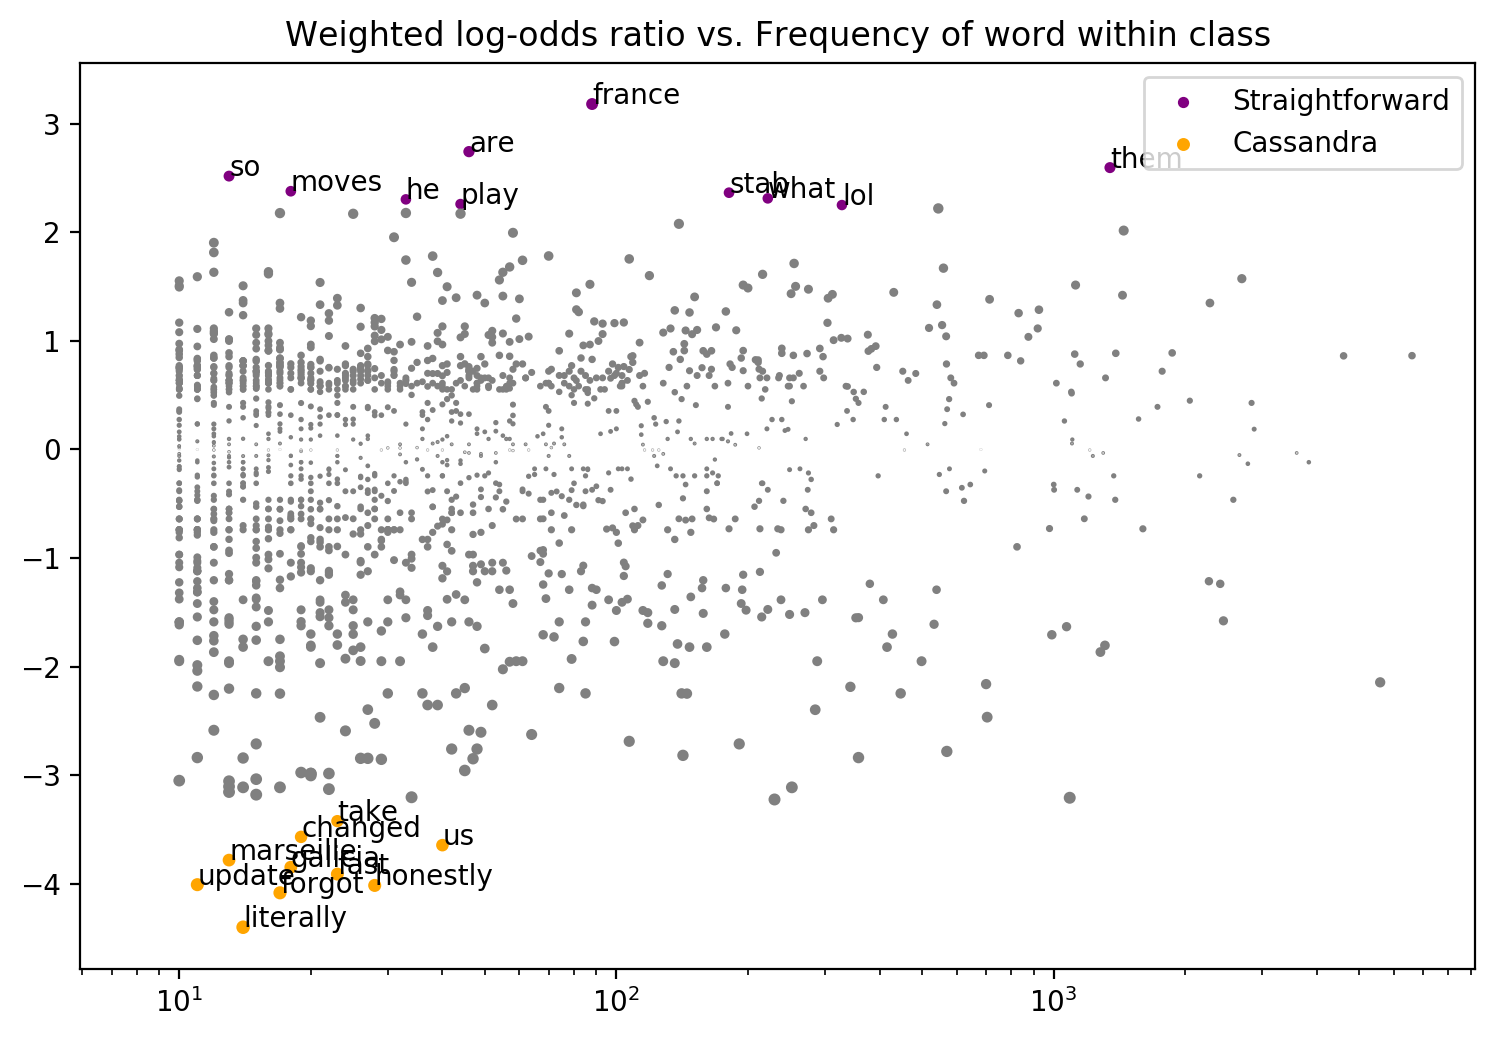

In [25]:
df_fw = fw.summarize(corpus_filter, plot=True, class1_name='Straightforward', class2_name='Cassandra')

class1_func returned 7374 valid corpus components. class2_func returned 2884 valid corpus components.
Vocab size is 1617
Comparing language...
ngram zscores computed.


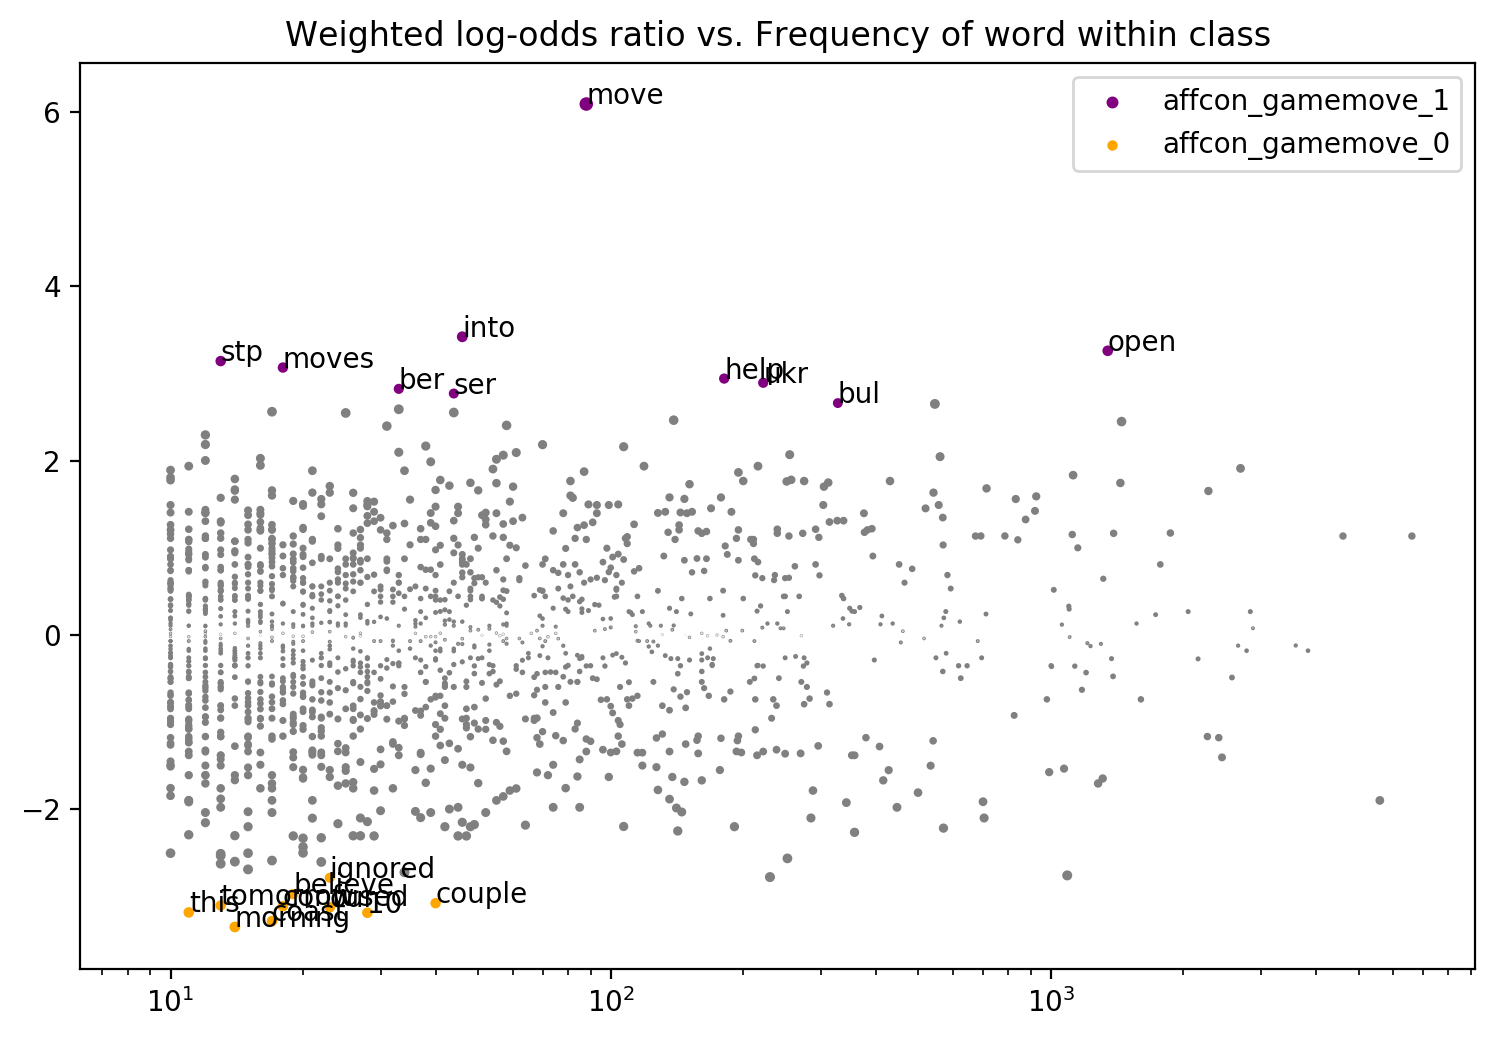

In [29]:
fw.fit(corpus_filter, class1_func=lambda utt: utt.meta['affcon_gamemove'] == 1,
                      class2_func=lambda utt: utt.meta['affcon_gamemove'] == 0)
df_fw = fw.summarize(corpus_filter, plot=True, class1_name='affcon_gamemove_1', class2_name='affcon_gamemove_0')

class1_func returned 7808 valid corpus components. class2_func returned 2450 valid corpus components.
Vocab size is 1617
Comparing language...
ngram zscores computed.


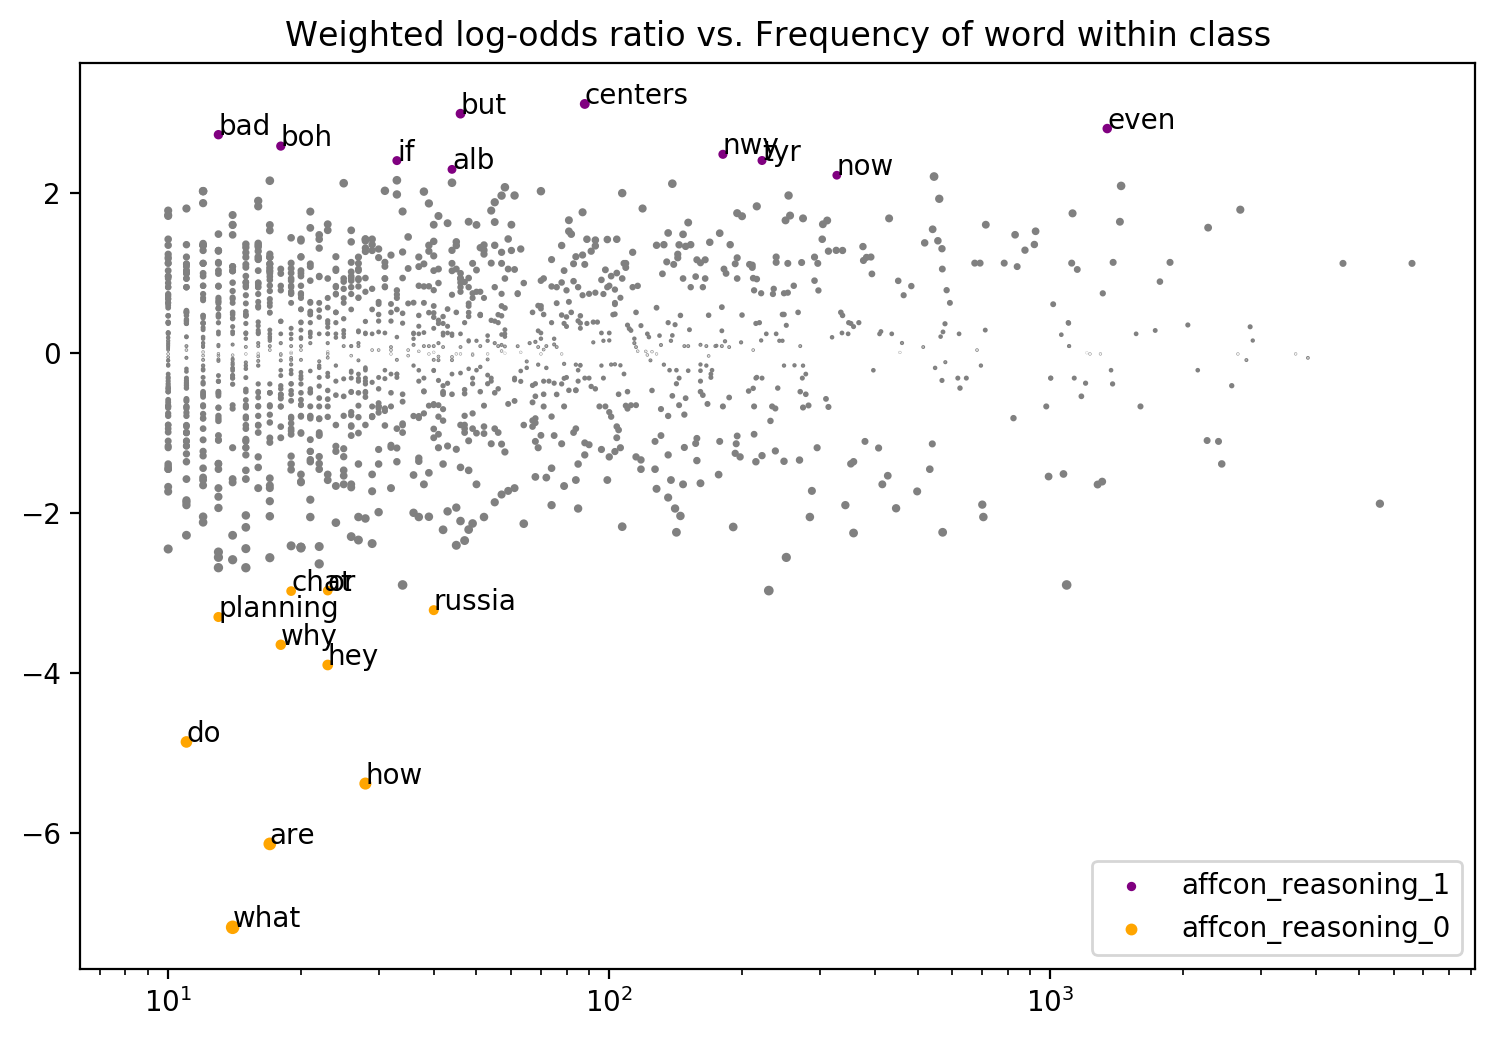

In [30]:
fw.fit(corpus_filter, class1_func=lambda utt: utt.meta['affcon_reasoning'] == 1,
                      class2_func=lambda utt: utt.meta['affcon_reasoning'] == 0)
df_fw = fw.summarize(corpus_filter, plot=True, class1_name='affcon_reasoning_1', class2_name='affcon_reasoning_0')

class1_func returned 6152 valid corpus components. class2_func returned 4106 valid corpus components.
Vocab size is 1617
Comparing language...
ngram zscores computed.


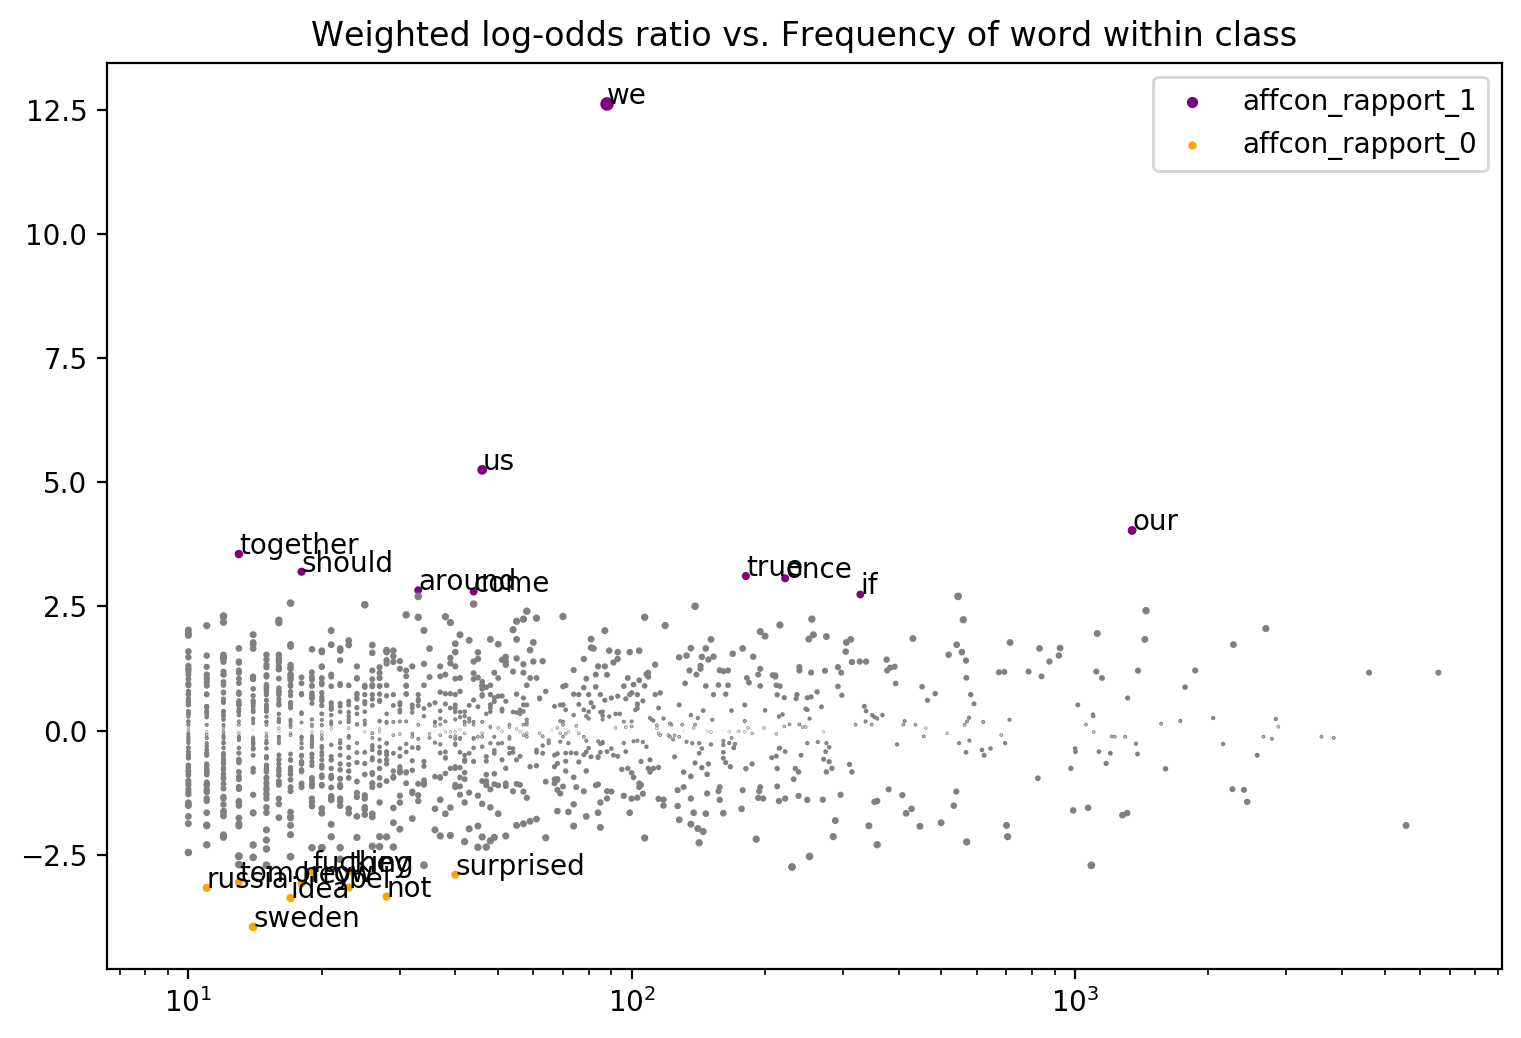

In [31]:
fw.fit(corpus_filter, class1_func=lambda utt: utt.meta['affcon_rapport'] == 1,
                      class2_func=lambda utt: utt.meta['affcon_rapport'] == 0)
df_fw = fw.summarize(corpus_filter, plot=True, class1_name='affcon_rapport_1', class2_name='affcon_rapport_0')

class1_func returned 5302 valid corpus components. class2_func returned 4956 valid corpus components.
Vocab size is 1617
Comparing language...
ngram zscores computed.


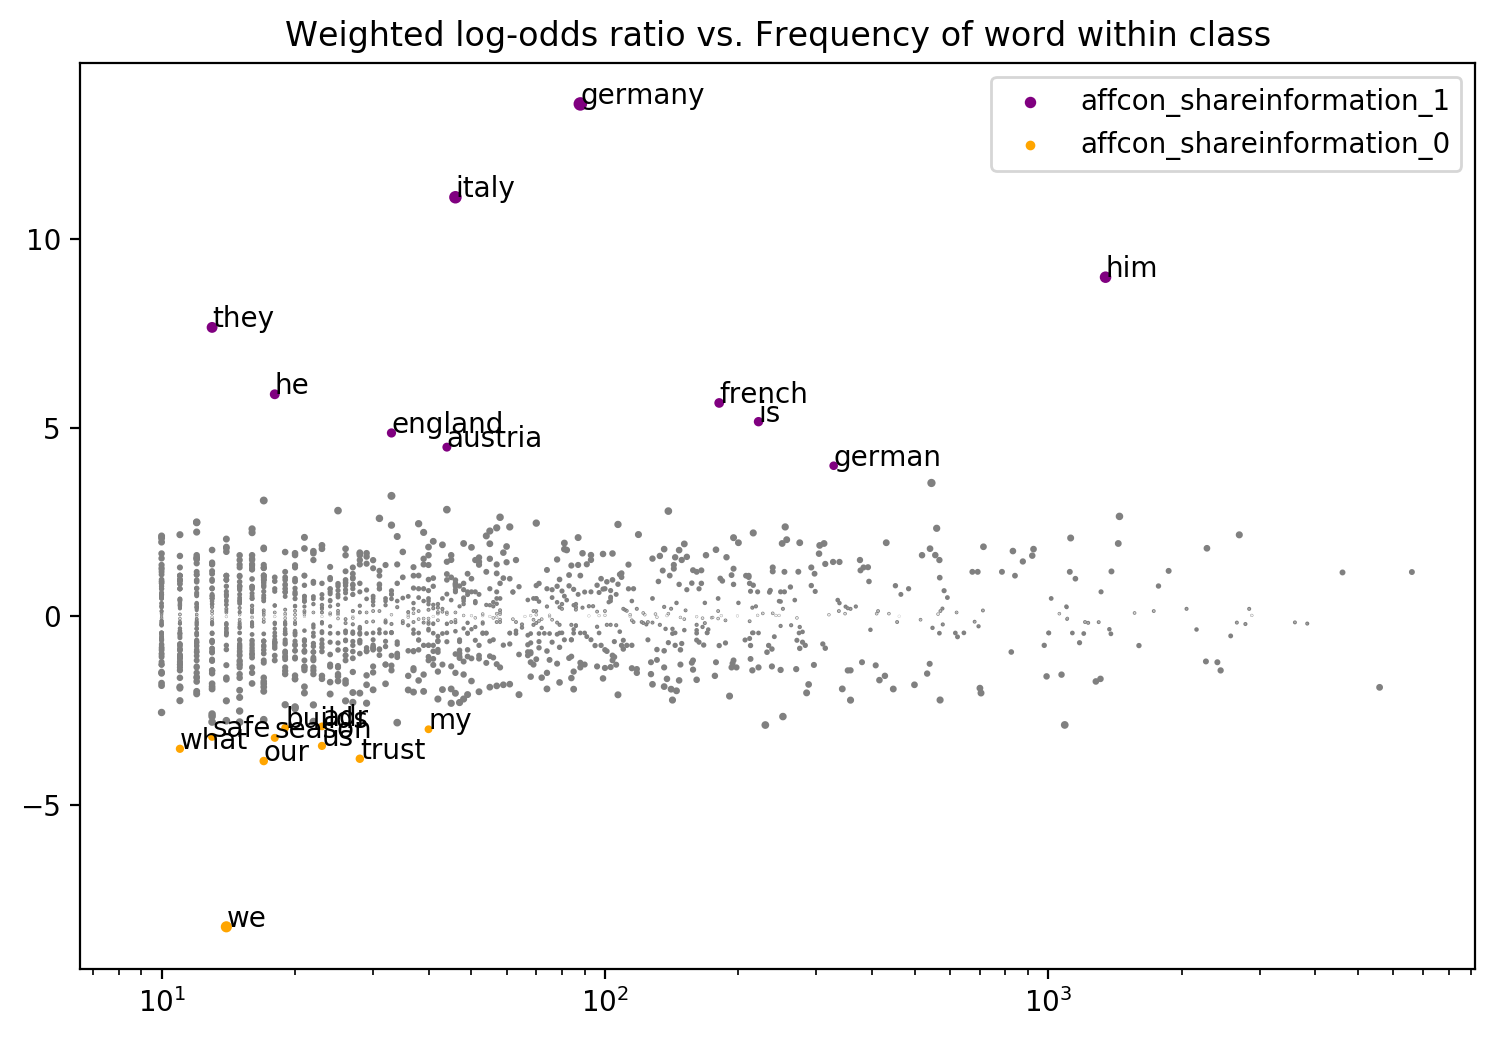

In [32]:
fw.fit(corpus_filter, class1_func=lambda utt: utt.meta['affcon_shareinformation'] == 1,
                      class2_func=lambda utt: utt.meta['affcon_shareinformation'] == 0)
df_fw = fw.summarize(corpus_filter, plot=True, class1_name='affcon_shareinformation_1', class2_name='affcon_shareinformation_0')

In [57]:
utt = corpus_filter.random_utterance()

In [61]:
from convokit.text_processing import TextParser
parser = TextParser(input_field='clean_text', verbosity=50)
corpus_filter = parser.transform(corpus_filter)

050/10258 utterances processed
100/10258 utterances processed
150/10258 utterances processed
200/10258 utterances processed
250/10258 utterances processed
300/10258 utterances processed
350/10258 utterances processed
400/10258 utterances processed
450/10258 utterances processed
500/10258 utterances processed
550/10258 utterances processed
600/10258 utterances processed
650/10258 utterances processed
700/10258 utterances processed
750/10258 utterances processed
800/10258 utterances processed
850/10258 utterances processed
900/10258 utterances processed
950/10258 utterances processed
1000/10258 utterances processed
1050/10258 utterances processed
1100/10258 utterances processed
1150/10258 utterances processed
1200/10258 utterances processed
1250/10258 utterances processed
1300/10258 utterances processed
1350/10258 utterances processed
1400/10258 utterances processed
1450/10258 utterances processed
1500/10258 utterances processed
1550/10258 utterances processed
1600/10258 utterances proce

In [62]:
texttagger = TextParser(output_field='tagged', input_field='clean_text', mode='tag')
corpus_filter = texttagger.transform(corpus_filter)

In [63]:
from convokit.text_processing import TextToArcs
VERBOSITY = 10000
get_arcs = TextToArcs('arcs', verbosity=VERBOSITY)
corpus_filter = get_arcs.transform(corpus_filter)

10000/10258 utterances processed
10258/10258 utterances processed


In [64]:
print(utt.retrieve_meta('arcs'))

None


In [51]:
from convokit.phrasing_motifs import CensorNouns, QuestionSentences
from convokit.convokitPipeline import ConvokitPipeline

In [53]:
def question_filter(utt):
    return utt.retrieve_meta('is_question')

In [54]:
q_arc_pipe = ConvokitPipeline([
    ('censor_nouns', CensorNouns('parsed_censored', verbosity=VERBOSITY)),
    ('shallow_arcs', TextToArcs('arcs_censored', input_field='parsed_censored', 
                               root_only=True, verbosity=VERBOSITY)),
    ('question_sentence_filter', QuestionSentences('question_arcs', input_field='arcs_censored',
                                         input_filter=question_filter, verbosity=VERBOSITY))
])

In [65]:
corpus_filter = q_arc_pipe.transform(corpus_filter)

10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed


In [59]:
utt.retrieve_meta('question_arcs')

In [69]:
corpus_filter.random_utterance()

Utterance({'obj_type': 'utterance', 'meta': {'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'russia-Game4', 'absolute_message_index': 1197, 'relative_message_index': 95, 'year': '1905', 'game_score': '6', 'game_score_delta': '-1', 'deception_quadrant': 'Straightforward', 'affcon_gamemove': 1, 'affcon_reasoning': 0, 'affcon_rapport': 1, 'affcon_shareinformation': 0, 'fighting_words_class1': ['so', 'he'], 'fighting_words_class2': []}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'country': 'england'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'england-Game4'}), 'conversation_id': 'Game4-england-russia', 'reply_to': 'Game4-england-russia-94', 'timestamp': 1197, 'text': 'Hey partner. Is there a way to resolve our current disagreements without violence?', 'owner': <convokit.model.corpus.Corpus object at 0x0000018CAD42BB08>, 'id': 'Game4-england-russia-95'})

In [70]:
from convokit.phrasing_motifs import PhrasingMotifs
pm_model = PhrasingMotifs('motifs','question_arcs',min_support=100,fit_filter=question_filter,
                          verbosity=VERBOSITY)

In [71]:
pm_model.fit(corpus_filter)

counting frequent itemsets for 0 sets
	first pass: counting itemsets up to and including 5 items large
	second pass: counting itemsets more than 5 items large
making itemset tree for 1 itemsets


ZeroDivisionError: division by zero

In [72]:
from convokit import BoWTransformer
bow_transformer = BoWTransformer(obj_type="utterance")

Initializing default unigram CountVectorizer...Done.


In [73]:
bow_transformer.fit_transform(corpus_filter)

In [81]:
from convokit import VectorClassifier
bow_classifier = VectorClassifier(obj_type="utterance", 
                                  vector_name='bow_vector',
                                  labeller=lambda utt: utt.meta['affcon_shareinformation'] > 0)
bow_classifier.fit_transform(corpus_filter)

Initialized default classification model (standard scaled logistic regression).


C:\Users\lynne\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.


In [82]:
print(bow_classifier.classification_report(corpus_filter))

              precision    recall  f1-score   support

       False       0.68      0.68      0.68      4956
        True       0.70      0.70      0.70      5302

   micro avg       0.69      0.69      0.69     10258
   macro avg       0.69      0.69      0.69     10258
weighted avg       0.69      0.69      0.69     10258



In [83]:
from convokit.prompt_types import PromptTypeWrapper
from convokit import PolitenessStrategies

In [87]:
pt_model = PromptTypeWrapper(n_types=6, use_prompt_motifs=False, root_only=False,
                            questions_only=False, enforce_caps=False, min_support=20, min_df=100,
                            svd__n_components=50, max_dist=1., random_state=1000)
pt_model.fit_transform(corpus_filter)

C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:52: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.
C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:54: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.
C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:57: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.


10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed
fitting 6294 input pairs
fitting reference tfidf model
fitting prompt tfidf model
fitting svd model
fitting 6 prompt types
10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed
10000/10258 utterances processed
10258/10258 utterances processed


C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:52: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.
C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:54: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.
C:\Users\lynne\Anaconda3\lib\site-packages\convokit\prompt_types\promptTypeWrapper.py:57: FutureWarning: get_info() is deprecated and will be removed in a future release. Use retrieve_meta() instead.


In [85]:
pt_model.summarize(corpus_filter, k=12)

TYPE 0
top prompt:
                     0         1         2         3         4         5  \
be_would      0.765216  0.977908  1.108690  1.031727  0.945015  1.023025   
wo_*          0.820039  1.026111  1.081281  1.056196  1.038439  1.035529   
want_*        0.827109  1.047258  1.113107  1.001190  0.975442  1.068590   
want_do       0.831246  1.092722  1.091704  0.981425  0.992773  1.109049   
before_*      0.852613  1.078750  1.055464  1.107191  0.984884  1.005869   
if>*          0.853019  0.953180  1.082519  1.080770  0.949284  1.138906   
into_*        0.863552  1.060772  1.053128  1.125531  1.058969  1.103861   
well_*        0.864260  1.007431  1.079332  1.098298  0.955791  0.889905   
makes_*       0.871488  0.984970  0.989375  1.032897  0.975753  0.995054   
being_*       0.878797  1.033422  1.026278  1.008069  1.007339  1.030188   
support_into  0.880987  1.091462  1.142656  1.141368  1.058485  1.091250   
support_*     0.891473  1.121080  1.069027  1.137866  1.061762  1.131

In [90]:
prompt_dist_df = corpus_filter.get_vectors(name='prompt_types__prompt_dists.6', 
                                         as_dataframe=True)
type_ids = np.argmin(prompt_dist_df.values, axis=1)
mask  = np.min(prompt_dist_df.values, axis=1) >= 1.
type_ids[mask] = 6

In [91]:
prompt_dist_df.head()

,type_0_dist,type_1_dist,type_2_dist,type_3_dist,type_4_dist,type_5_dist
Game1-italy-germany-0,0.921421,0.995672,0.890482,1.016511,0.918891,0.889159
Game1-italy-germany-3,0.955973,0.912206,0.983301,0.948458,0.912793,0.834265
Game1-italy-germany-7,1.134991,1.022137,0.994257,1.116157,1.064222,0.861298
Game1-italy-germany-8,0.913403,0.878644,0.985897,0.958567,1.011791,0.980672
Game1-italy-germany-9,0.891657,0.949913,0.916670,1.008463,0.934106,0.993607


In [92]:
prompt_type_assignments = np.zeros((len(prompt_dist_df), prompt_dist_df.shape[1]+1))
prompt_type_assignments[np.arange(len(type_ids)),type_ids] = 1
prompt_type_assignment_df = pd.DataFrame(columns=np.arange(prompt_dist_df.shape[1]+1), index=prompt_dist_df.index, 
                                        data=prompt_type_assignments)
prompt_type_assignment_df = prompt_type_assignment_df[prompt_type_assignment_df.columns[:-1]]

TYPE_NAMES = ['Prompt: Casual', 'Prompt: Moderation', 'Prompt: Coordination', 'Prompt: Contention',
             'Prompt: Editing', 'Prompt: Procedures']
prompt_type_assignment_df.columns = TYPE_NAMES

In [93]:
prompt_type_assignment_df.head()

,Prompt: Casual,Prompt: Moderation,Prompt: Coordination,Prompt: Contention,Prompt: Editing,Prompt: Procedures
Game1-italy-germany-0,0.0,0.0,0.0,0.0,0.0,1.0
Game1-italy-germany-3,0.0,0.0,0.0,0.0,0.0,1.0
Game1-italy-germany-7,0.0,0.0,0.0,0.0,0.0,1.0
Game1-italy-germany-8,0.0,1.0,0.0,0.0,0.0,0.0
Game1-italy-germany-9,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
ps = PolitenessStrategies(verbose=1000)
corpus_filter = ps.transform(corpus_filter)

In [104]:
utterance_ids = corpus_filter.get_utterance_ids()
rows = []
for uid in utterance_ids:
    rows.append(corpus_filter.get_utterance(uid).meta["politeness_strategies"])
politeness_strategies = pd.DataFrame(rows, index=utterance_ids)
politeness_strategies['msg_id'] = politeness_strategies.index

In [105]:
politeness_strategies.head()

,feature_politeness_==Please==,feature_politeness_==Please_start==,feature_politeness_==HASHEDGE==,feature_politeness_==Indirect_(btw)==,feature_politeness_==Hedges==,feature_politeness_==Factuality==,feature_politeness_==Deference==,feature_politeness_==Gratitude==,feature_politeness_==Apologizing==,feature_politeness_==1st_person_pl.==,...,feature_politeness_==2nd_person==,feature_politeness_==2nd_person_start==,feature_politeness_==Indirect_(greeting)==,feature_politeness_==Direct_question==,feature_politeness_==Direct_start==,feature_politeness_==HASPOSITIVE==,feature_politeness_==HASNEGATIVE==,feature_politeness_==SUBJUNCTIVE==,feature_politeness_==INDICATIVE==,msg_id
Game1-italy-germany-0,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,1,1,0,0,Game1-italy-germany-0
Game1-italy-germany-3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,Game1-italy-germany-3
Game1-italy-germany-7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Game1-italy-germany-7
Game1-italy-germany-8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Game1-italy-germany-8
Game1-italy-germany-9,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,Game1-italy-germany-9


In [99]:
politeness_strategies.to_csv('./politeness_strategies.csv')

In [107]:
df_politeness_merge = politeness_strategies.merge(df, left_on='msg_id', right_on='Input.msg_id')

In [109]:
df_politeness_merge.to_csv('./politeness_strategies_merge.csv')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from nltk.util import ngrams
import nltk, collections

In [4]:
full_df = pd.read_csv('politeness_strategies_merge.csv')

In [22]:
df_rapport = full_df[full_df['affcon_shareinformation'] == 1]
df_no_rapport = full_df[full_df['affcon_shareinformation'] == 0]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,4), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_rapport['Input.full_text'])
frequencies = sum(sparse_matrix).data
df_rapport_frequency = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [27]:
df_rapport_frequency = df_rapport_frequency.sort_values(by=['frequency'], ascending=False)
df_rapport_frequency.head(20)

,frequency
means of gaining ground,5818
meant had,4121
means ruh,3232
mean you re thinking,2938
mean you could possibly,2118
mean no truce,1812
meaning that,1571
mean you decide to,1461
means picardy eng,1447
mean bump,1386


In [28]:
df_rapport_frequency.to_csv('./ngrams_results/df_shareinfo_ngrams.csv')

### Finding Pronouns

In [29]:
first_person = ["i", "me", "mine", "myself", "we", "us", "ours", "ourselves", "our"]
second_person = ["you","your","yours","yourself","yourselves"]
third_person = ["he", "she", "him", "her", "his", "hers", "himself", "herself"
                "they", "them", "theirs", "themselves", "their"]

In [57]:
df_rapport = full_df[full_df['affcon_gamemove'] == 1]
df_no_rapport = full_df[full_df['affcon_gamemove'] == 0]

In [58]:
first_list = []
second_list = []
third_list = []

total_words = 0

In [60]:
import re 

for idx, row in df_no_rapport.iterrows():
    text = row['Input.full_text'].strip()
    text_split = text.split(' ')
    for word in text_split:
        word = re.sub("\.|\,|\:|\!|\?|\"|\'|\;|\)|\(", "", word)
        total_words += 1
        word = word.lower()
        
        if word in first_person: 
            first_list.append(word)
        elif word in second_person: 
            second_list.append(word)
        elif word in third_person:
            third_list.append(word)
        
length_first = len(first_list)
length_second = len(second_list)
length_third = len(third_list)

nominalize = 100

length_first = (length_first/total_words) * nominalize
length_second = (length_second/total_words) * nominalize
length_third = (length_third/total_words) * nominalize

print('first: ', length_first, '\n', 'second: ', length_second, '\n', 'third: ', length_third)

first:  5.397942811656571 
 second:  3.6048473692284095 
 third:  1.135143426905967


In [61]:
import re 

for idx, row in full_df.iterrows():
    text = row['Input.full_text'].strip()
    text_split = text.split(' ')
    
    first_person_count = 0
    second_person_count = 0
    third_person_count = 0
    total_words = 0
    
    for word in text_split:
        word = re.sub("\.|\,|\:|\!|\?|\"|\'|\;|\)|\(", "", word)
        total_words += 1
        word = word.lower()
        
        if word in first_person: 
            first_person_count += 1
        elif word in second_person: 
            second_person_count += 1
        elif word in third_person:
            third_person_count += 1
            
        full_df.at[idx, 'first_person'] = float(first_person_count/ total_words)
        full_df.at[idx, 'second_person'] = float(second_person_count/ total_words)
        full_df.at[idx, 'third_person'] = float(third_person_count/ total_words)

In [62]:
df_no_rapport['first_person'].describe()

count    4420.000000
mean        0.053339
std         0.060171
min         0.000000
25%         0.000000
50%         0.043478
75%         0.095238
max         0.333333
Name: first_person, dtype: float64

In [63]:
df_no_rapport['second_person'].describe()

count    4420.000000
mean        0.037571
std         0.056038
min         0.000000
25%         0.000000
50%         0.000000
75%         0.071429
max         0.333333
Name: second_person, dtype: float64

In [64]:
df_no_rapport['third_person'].describe()

count    4420.000000
mean        0.010441
std         0.031292
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.333333
Name: third_person, dtype: float64

In [65]:
df_rapport['first_person'].describe()

count    11318.000000
mean         0.053954
std          0.057895
min          0.000000
25%          0.000000
50%          0.047619
75%          0.090909
max          0.333333
Name: first_person, dtype: float64

In [66]:
df_rapport['second_person'].describe()

count    11318.000000
mean         0.039349
std          0.053361
min          0.000000
25%          0.000000
50%          0.000000
75%          0.074074
max          0.400000
Name: second_person, dtype: float64

In [67]:
df_rapport['third_person'].describe()

count    11318.000000
mean         0.010886
std          0.030706
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.285714
Name: third_person, dtype: float64